 # SCS1 (iPSC vs Others) dataset as example.

## import the packages

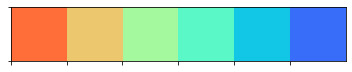

In [2]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


from aggmap import AggMap
from joblib import load,dump

from utils.dscarnet import dual_dscarnet
from utils.PCA_tool import PCA_transform
np.random.seed(888)

color = sns.color_palette("rainbow_r", 6) 
sns.palplot(color)


os.environ["CUDA_VISIBLE_DEVICES"]="0"
physical_gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_gpus[0], True)


## data processing

In [3]:
df = pd.read_csv('dataset/SCS.csv').iloc[:,1:]

In [4]:
df

,label,319.258,322.902,326.545,330.186,333.824,337.462,341.099,344.734,348.368,...,1771.66,1774.75,1777.83,1780.92,1784,1787.08,1790.17,1793.24,1796.32,1799.4
0,OTHER,0.001514,0.000816,0.000921,0.000719,0.000985,0.001024,0.000964,0.001195,0.000754,...,0.000603,3.630000e-17,7.935740e-04,8.077730e-04,0.001003,1.031295e-03,7.087760e-04,0.000556,0.000361,0.000302
1,OTHER,0.002712,0.002558,0.001985,0.002420,0.002236,0.001807,0.001925,0.002246,0.001539,...,0.000957,3.727660e-04,5.300080e-04,2.027900e-04,0.000364,3.040210e-04,8.810000e-17,0.000455,0.000304,0.000223
2,OTHER,0.001476,0.001367,0.001466,0.002108,0.001322,0.001586,0.001460,0.001311,0.001087,...,0.000579,-2.040000e-16,5.306180e-04,5.127810e-04,0.000859,4.236630e-04,1.968000e-04,0.000563,0.000395,0.000408
3,OTHER,0.001460,0.001370,0.001747,0.001451,0.001184,0.001542,0.001051,0.001227,0.001493,...,0.000595,3.658820e-04,6.416930e-04,6.170940e-04,0.000458,6.160000e-17,4.084410e-04,0.000382,0.000481,0.000134
4,OTHER,0.002125,0.002108,0.001620,0.001725,0.001675,0.001048,0.001475,0.001926,0.001212,...,0.002510,5.279770e-04,5.628480e-04,5.581010e-04,0.000673,5.905160e-04,5.420000e-05,0.001012,0.000637,0.000519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769,iPSC,0.001871,0.000833,0.002014,0.001830,0.002027,0.002656,0.002007,0.001815,0.002817,...,0.000779,5.668120e-04,4.320000e-17,5.880790e-04,0.000820,5.378680e-04,1.819940e-04,0.000260,0.000063,0.000263
8770,iPSC,0.002978,0.003100,0.003716,0.002717,0.002636,0.003308,0.002779,0.001881,0.001654,...,0.000651,1.532544e-03,1.584219e-03,9.499710e-04,0.001697,1.070876e-03,7.966140e-04,0.001619,0.001827,0.001349
8771,iPSC,0.001227,0.002176,0.003017,0.001452,0.001660,0.001197,0.002600,0.002833,0.002755,...,0.000187,1.334972e-03,1.356227e-03,1.547478e-03,0.000663,6.960340e-04,6.967650e-04,0.001151,0.001194,0.000824
8772,iPSC,0.001727,0.001509,0.001428,0.002757,0.001488,0.001877,0.002593,0.001720,0.001625,...,0.000109,1.019713e-03,6.486190e-04,6.002350e-04,0.000275,4.701520e-04,6.297940e-04,0.000231,0.001147,0.000393


In [5]:
df_pca = PCA_transform(df.iloc[:,1:],30)

In [6]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,806,807,808,809,837,838,839,868,869,899
0,0.313378,0.061172,-0.650391,0.821060,0.562980,0.702822,0.755320,0.230781,0.236442,0.303944,...,-1.217904,-1.318722,-0.411205,-0.587462,-0.644456,0.001650,-0.174539,0.651021,0.745909,0.403323
1,-0.767300,-0.885518,-0.339779,-0.508190,-1.150856,-0.688299,-0.711832,-0.650202,-0.796915,-0.631314,...,1.041256,0.624303,-0.265523,1.213331,-0.163866,-1.128483,0.355401,-1.436226,-0.544315,0.671039
2,-0.454528,-0.588440,-1.511957,-0.259404,-0.504681,-0.595057,-0.423962,-0.428485,-0.274104,-0.453593,...,0.407752,0.123984,0.292286,0.204875,-0.235357,-0.165246,-0.254053,0.002437,-0.085286,-0.123326
3,-0.855841,-0.951752,-1.537930,-0.094024,-1.203644,-0.981584,-1.015542,-0.722210,-0.994886,-0.893763,...,0.564043,-0.033881,0.568773,-0.282044,-0.617375,-0.270376,-1.126975,0.237794,-0.521813,-0.978411
4,0.001473,-0.256258,0.328121,0.805529,-0.205812,-0.237941,0.260430,0.062051,-0.076064,-0.003354,...,1.296558,0.143832,0.056544,0.570068,-1.104152,-1.654745,-1.142530,-1.236474,-1.234938,-0.508421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769,-0.056715,-0.321881,0.158606,-0.176358,-0.016054,-0.140444,-0.126921,-0.138888,-0.060372,-0.220510,...,-0.579575,-0.279202,0.244960,0.356372,0.188237,0.794576,0.907701,0.937926,1.441080,1.100445
8770,2.254918,2.168658,1.959841,1.537932,2.036874,2.106036,2.147703,2.130381,1.937202,2.440576,...,0.607732,1.823529,-0.563379,1.389133,1.977454,0.401722,2.365430,-1.420422,-0.043836,1.364506
8771,1.644361,1.523087,0.822165,1.110343,1.720201,1.403203,1.749708,1.481213,1.664669,1.665128,...,1.325181,-0.186480,1.828425,-0.104447,-1.602330,-0.248535,-2.194906,1.260192,-0.166195,-1.501256
8772,0.626306,0.231901,-0.066035,0.289803,0.643528,0.416312,0.532798,0.331648,0.904622,0.337062,...,1.797227,-0.354239,1.897238,-0.079281,-2.317069,-1.024400,-3.016450,0.878766,-0.750928,-1.946916


In [7]:
# channel 9 for example
mp_sar = AggMap(df.iloc[:,1:],metric = 'euclidean')
mp_sar = mp_sar.fit(cluster_channels = 9, verbose = 0)
mp_sar.save('mp_example/scs_sar.mp')

2023-07-07 13:24:26,880 - INFO - [bidd-aggmap] - Calculating distance ...
2023-07-07 13:24:26,894 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 443/443 [00:00<00:00, 567.60it/s]


2023-07-07 13:24:34,128 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2023-07-07 13:24:39,825 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2023-07-07 13:24:40,102 - INFO - [bidd-aggmap] - Finished


['mp_example/scs_sar.mp']

In [8]:
# channel 9 for example
mp_car = AggMap(df_pca,metric = 'euclidean')
mp_car = mp_car.fit(cluster_channels = 9, verbose = 0)
mp_car.save('mp_example/scs_car.mp')

2023-07-07 13:24:40,278 - INFO - [bidd-aggmap] - Calculating distance ...
2023-07-07 13:24:40,291 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 465/465 [00:01<00:00, 445.57it/s]


2023-07-07 13:24:48,494 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2023-07-07 13:24:49,863 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2023-07-07 13:24:50,094 - INFO - [bidd-aggmap] - Finished


['mp_example/scs_car.mp']

In [9]:
mp_sar = load('mp_example/scs_sar.mp')
mp_car = load('mp_example/scs_car.mp')

In [11]:
X1 = mp_sar.batch_transform(df.iloc[:,1:].values,scale_method = 'minmax')
dump(X1,'mp_example/scs_x1.data')

100%|##########| 8774/8774 [00:05<00:00, 1595.70it/s]


['mp_example/scs_x1.data']

In [12]:
X2 = mp_car.batch_transform(df_pca.values,scale_method = 'minmax')
dump(X2,'mp_example/scs_x2.data')

100%|##########| 8774/8774 [00:04<00:00, 2047.14it/s]


['mp_example/scs_x2.data']

In [13]:
X1 = load('mp_example/scs_x1.data')
X2 = load('mp_example/scs_x2.data')

In [14]:
Y = pd.get_dummies(df['label']).values
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [15]:
from utils.dscarnet import dual_dscarnet


## model training

In [17]:
outer = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 8)
outer_idx = list(outer.split(X1,df['label']))
for i, idx in enumerate(outer_idx):
    
    train_idx, valid_idx = idx

    validY = Y[valid_idx]
    validX = X1[valid_idx],X2[valid_idx]

    trainY = Y[train_idx]
    trainX = X1[train_idx],X2[train_idx]
    
    model = dual_dscarnet(X1.shape[1:], X2.shape[1:])
    opt = tf.keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) #
    model.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics=['accuracy'])


    early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10,#for example
                                                      restore_best_weights=True)

    model.fit(trainX, trainY,
                              batch_size=128, 
                              epochs= 10,#for example 
                                verbose= 1, shuffle = True, 
                              validation_data = (validX, validY), 
                               callbacks=[early_stopping_cb],)
    break#for example

Epoch 1/10
55/55 [==============================] - 5s 58ms/step - loss: 12.9136 - accuracy: 0.6220 - val_loss: 11.2656 - val_accuracy: 0.6222
Epoch 2/10
55/55 [==============================] - 3s 49ms/step - loss: 10.1425 - accuracy: 0.6220 - val_loss: 9.0764 - val_accuracy: 0.6222
Epoch 3/10
55/55 [==============================] - 3s 49ms/step - loss: 8.1886 - accuracy: 0.7481 - val_loss: 7.3391 - val_accuracy: 0.8923
Epoch 4/10
55/55 [==============================] - 3s 49ms/step - loss: 6.7061 - accuracy: 0.8903 - val_loss: 6.1090 - val_accuracy: 0.8798
Epoch 5/10
55/55 [==============================] - 3s 49ms/step - loss: 5.5942 - accuracy: 0.9228 - val_loss: 5.1105 - val_accuracy: 0.9459
Epoch 6/10
55/55 [==============================] - 3s 49ms/step - loss: 4.7372 - accuracy: 0.9461 - val_loss: 4.3682 - val_accuracy: 0.9561
Epoch 7/10
55/55 [==============================] - 3s 50ms/step - loss: 4.1021 - accuracy: 0.9414 - val_loss: 3.7999 - val_accuracy: 0.9550
Epoch 8/10